In [1]:
%matplotlib ipympl

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# some handy functions to use along widgets
from IPython.display import display, Markdown, clear_output
# widget packages
import ipywidgets as widgets

In [101]:
%run pyilt.py

(-0.01, 1.0)

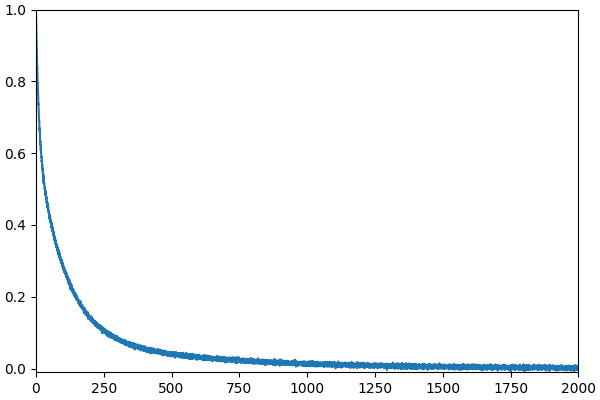

In [102]:
size = 10000
times = np.linspace(0,2000,size)
decay = 0.55*np.exp(-times/100) + 0.35*np.exp(-times/10) + 0.1*np.exp(-times/500)
noise = 0.003*np.random.randn(size)
decay = decay + noise

fig, ax = plt.subplots(figsize=(6,4),constrained_layout=True)
ax.plot(times,decay)
ax.set_xlim([0,times.max()])
ax.set_ylim([-0.01,1])

In [103]:
plt.close('all')

In [104]:
nregs = 32
bins, amps, regs, errs, solvs = lcurve(times, decay, 
                                       nregs=nregs,
                                       reglims=[-2.0,1.0],
                                       nbins=256, 
                                       tmin=1e-2,
                                       tmax=1e4,
                                       nprune=512)

Iteration 0, Reguralizer 0.01, Solution 0.2588452333035963
Iteration 1, Reguralizer 0.012496091412919868, Solution 0.25041496946835673
Iteration 2, Reguralizer 0.015615230060004972, Solution 0.24351512228882058
Iteration 3, Reguralizer 0.01951293422635963, Solution 0.23552167904519655
Iteration 4, Reguralizer 0.02438354098268829, Solution 0.22703801096351275
Iteration 5, Reguralizer 0.03046989570903508, Solution 0.21978486152908272
Iteration 6, Reguralizer 0.038075460212223716, Solution 0.2118867220422355
Iteration 7, Reguralizer 0.04757944314009409, Solution 0.20436141790409454
Iteration 8, Reguralizer 0.05945570708544391, Solution 0.19798643570083005
Iteration 9, Reguralizer 0.0742963950759495, Solution 0.19074821607069367
Iteration 10, Reguralizer 0.09284145445194744, Solution 0.18410947958205162
Iteration 11, Reguralizer 0.11601553017399714, Solution 0.17731148854601855
Iteration 12, Reguralizer 0.14497406703726315, Solution 0.17089553324204879
Iteration 13, Reguralizer 0.181160919

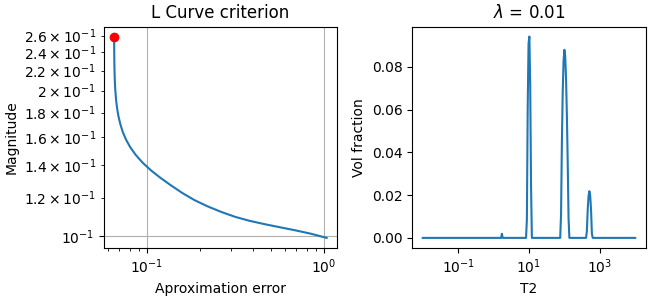

In [105]:
fig, axs = plt.subplots(1,2, figsize=(6.5,3), constrained_layout=True)
line, = axs[0].loglog(errs, solvs)
point, = axs[0].plot([errs[0]], [solvs[0]], marker='o', color='red')
axs[0].grid(True)
axs[0].set_title('L Curve criterion')
axs[0].set_xlabel('Aproximation error')
axs[0].set_ylabel('Magnitude')
axs[1].set_title(r'$\lambda$ = {:.2f}'.format(regs[0]))
axs[1].set_xlabel('T2')
axs[1].set_ylabel('Vol fraction')

dline, = axs[1].semilogx(bins[0,:], amps[0,:])

def update(change):
    new_idx = change.new
    point.set_xdata([errs[new_idx]])
    point.set_ydata([solvs[new_idx]])
    dline.set_xdata(bins[new_idx,:])
    dline.set_ydata(amps[new_idx,:])
    axs[1].set_title(r'$\lambda$ = {:.2f}'.format(regs[new_idx]))
    fig.canvas.draw()

int_slider = widgets.IntSlider(
    value=1,
    min=0, max=nregs-1, step=1,
    description='$\lambda$',
    continuous_update=False
)
int_slider.observe(update, 'value')
grapher = widgets.HBox([int_slider])
display(grapher)


In [92]:
plt.close('all')